In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt # Plotting
import seaborn as sns # Matplotlib Styles

import carvana_utils as carvana
import constants as c

## Metadata Analysis
#### Information Gathered
* 16 Samples [Photos] taken per Car ;
* Not all cars in the training set are present in test set ;
* Year, Manufactorer, Model and two Trims are given per Car.

#### Metadata Pandas File

In [3]:
c.METADATA_CSV.head(4)

,id,year,make,model,trim1,trim2,train,test
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE,False,True
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech,True,False
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport,False,True
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS,False,True


#### Metadata Data Types

In [4]:
metadata_types = pd.DataFrame(columns=['name','type'])
for index, col in enumerate(c.METADATA_CSV.columns):
    metadata_types.loc[index] = [col, c.METADATA_CSV[col].dtype]
metadata_types

,name,type
0,id,object
1,year,float64
2,make,object
3,model,object
4,trim1,object
5,trim2,object
6,train,bool
7,test,bool


#### Train / Test Split Analysis

In [5]:
all_dataset_ids = np.unique(c.METADATA_CSV['id']).tolist()
train_dataset_ids = np.unique(c.TRAIN_MASKS_CSV['id']).tolist()
test_dataset_ids = list(set(all_dataset_ids) - set(train_dataset_ids))
args = [
    len(train_dataset_ids), float(len(train_dataset_ids))/len(all_dataset_ids)*100,
    len(test_dataset_ids), float(len(test_dataset_ids))/len(all_dataset_ids)*100,
    len(all_dataset_ids), 100.0
]
print("Train Samples \t{} ({:.2f}%)\nTest Samples \t{} ({:.2f}%)\nAll Samples \t{} ({:.2f}%)".format(*args))

Train Samples 	318 (4.84%)
Test Samples 	6254 (95.16%)
All Samples 	6572 (100.00%)


#### Metadata Visualization 

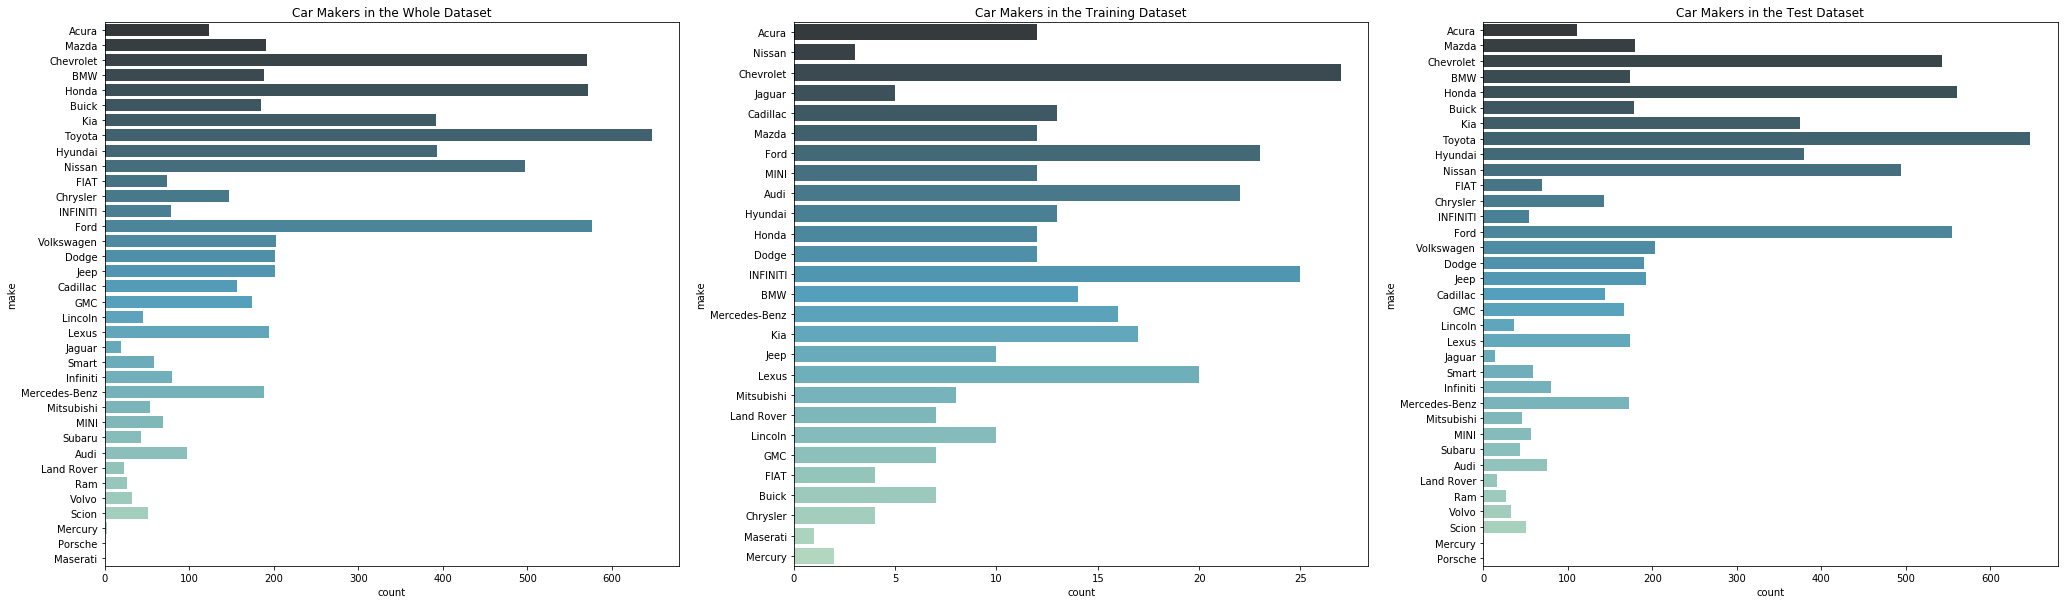

In [6]:
plt.figure(figsize=(35,10))
plt.subplot(131)
plt.style.use('seaborn-dark-palette')
plt.title('Car Makers in the Whole Dataset')
sns.countplot(y="make", data=c.METADATA_CSV, palette='GnBu_d')

plt.subplot(132)
plt.style.use('seaborn-dark-palette')
plt.title('Car Makers in the Training Dataset')
data = c.METADATA_CSV[c.METADATA_CSV.id.isin(train_dataset_ids)]
sns.countplot(y="make", data=data, palette='GnBu_d')

plt.subplot(133)
plt.style.use('seaborn-dark-palette')
plt.title('Car Makers in the Test Dataset')
data = c.METADATA_CSV[c.METADATA_CSV.id.isin(test_dataset_ids)]
sns.countplot(y="make", data=data, palette='GnBu_d')
plt.show()

## Data Analysis
#### Trainning Masks Pandas

In [7]:
c.TRAIN_MASKS_CSV.head(4)

,img,rle_mask,id
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...,00087a6bd4dc
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...,00087a6bd4dc
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...,00087a6bd4dc
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...,00087a6bd4dc


#### Image + Mask + Element-wise Product between both

In [12]:
image_id = c.train_ids[0]
# Load Mask and Image to Numpy Tensor
img = carvana.get_image_data(image_id, "Train")
mask = carvana.get_image_data(image_id, "Train_mask")
# Mask x Image
img_masked = cv2.bitwise_and(img, img, mask=mask)

print("Image shape: {}  \t| Image type: {}\nMask shape: {} \t| Mask type: {}".format(img.shape, img.dtype, mask.shape, mask.dtype))
print('-'*52)
print("Data composed by: {}".format(type(img_masked)))

Image shape: (1280, 1918, 3)  	| Image type: uint8
Mask shape: (1280, 1918) 	| Mask type: uint8
----------------------------------------------------
Data composed by: <type 'numpy.ndarray'>


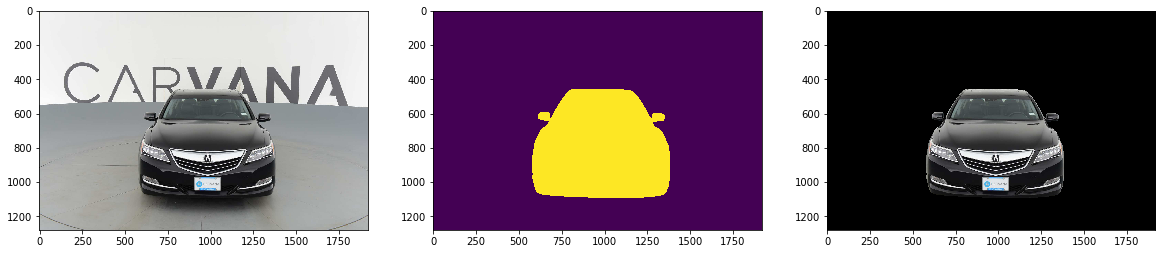

In [13]:
plt.figure(figsize=(20, 20))

plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(img_masked)

plt.show()

#### Example of Different Training Dataset Samples

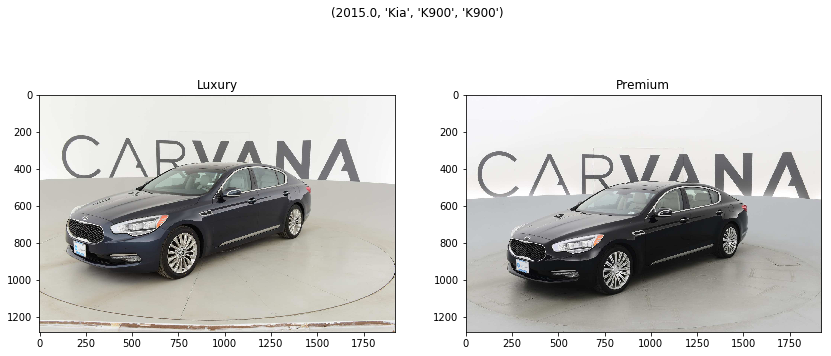

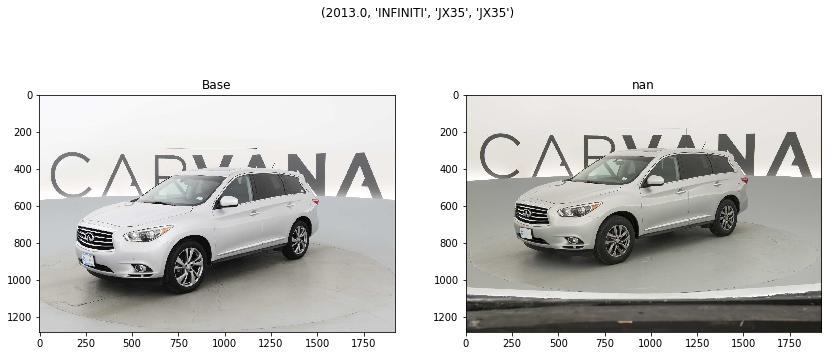

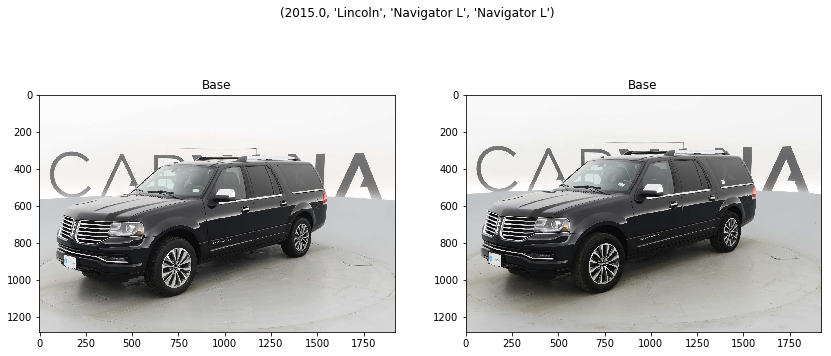

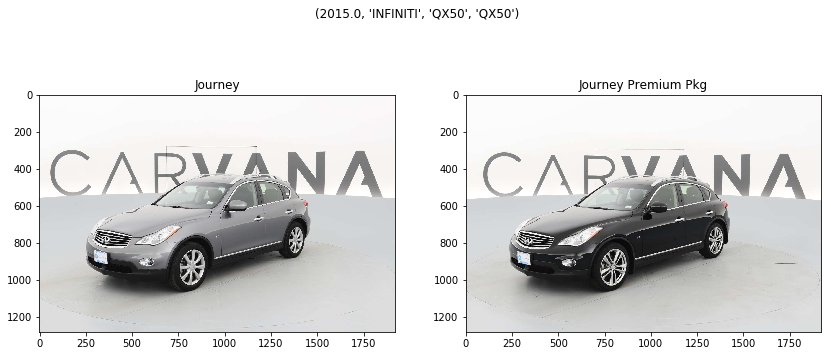

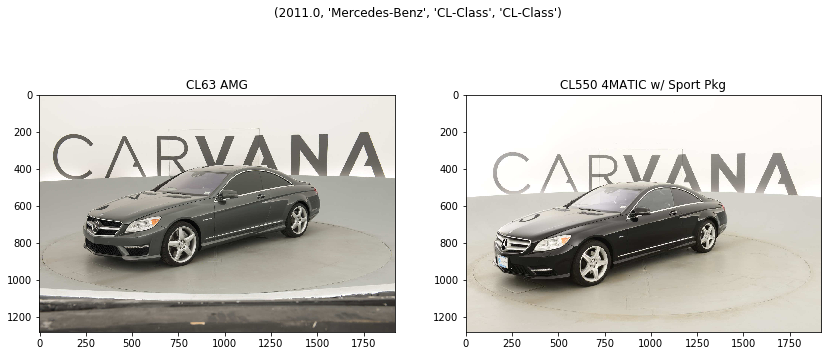

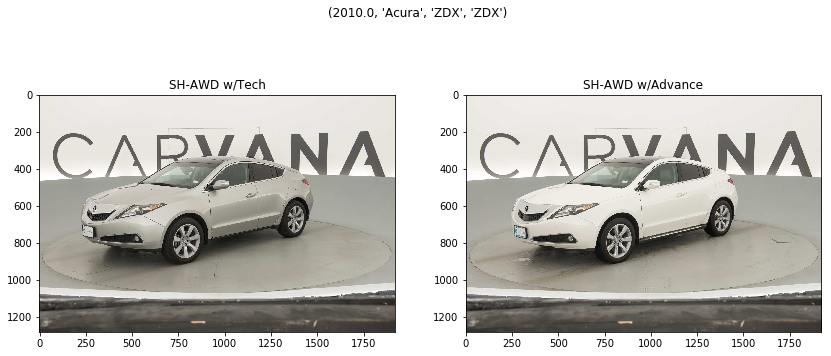

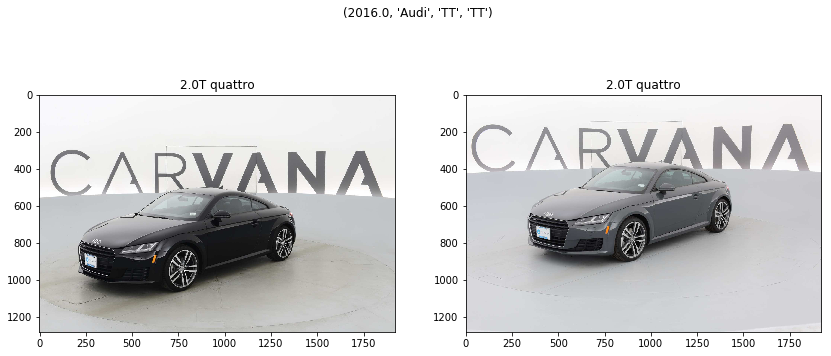

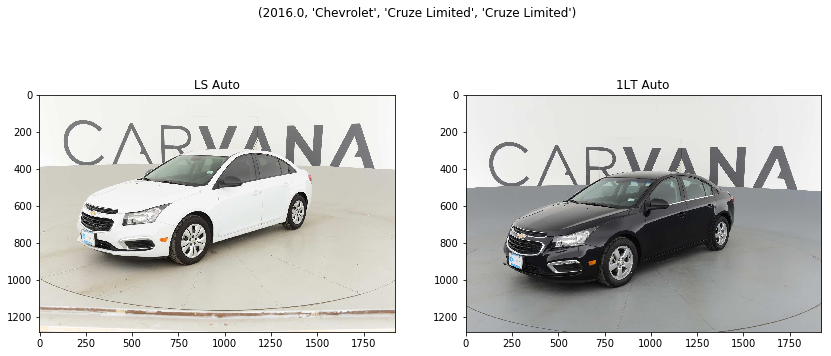

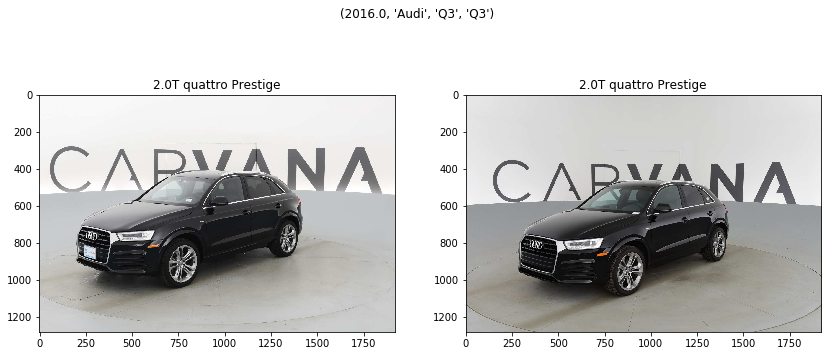

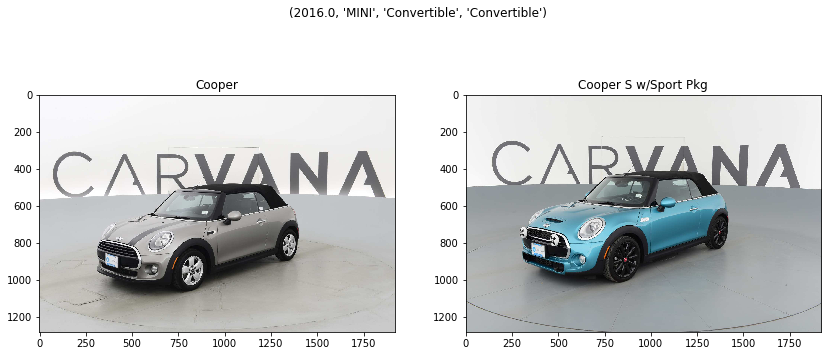

In [34]:
train_gb_year_make_model_trim1 = c.METADATA_CSV[c.METADATA_CSV.train == True].groupby(['year', 'make', 'model', 'trim1'])
len(train_gb_year_make_model_trim1.groups)
similar_cars = [k for k in train_gb_year_make_model_trim1.groups if len(train_gb_year_make_model_trim1.groups[k]) > 1]
for gname in similar_cars:
    _ids = train_gb_year_make_model_trim1.get_group(gname)['id']
    _trim2 = train_gb_year_make_model_trim1.get_group(gname)['trim2']
    plt.figure(figsize=(14, 6))
    plt.suptitle("{}".format(gname))    
    n = len(_ids)
    for i, _id in enumerate(_ids):
        plt.subplot(1, n, i + 1)
        plt.title('{}'.format(_trim2.iloc[i]))
        img = carvana.get_image_data(_id + '_03', 'Train')
        plt.imshow(img)         
plt.show()